# Redes Neuronais

Este trabalho laboratorial tem por objetivo usar classificadores baseados em redes neuronais.


# Conteúdo
- [ 1 - Bibliotecas ](#1)
- [ 2 - Redes Neuronais](#2)
  - [ 2.1 Definição do Problema](#2.1)
  - [ 2.2 *Dataset*](#2.2)
  - [ 2.3 Representação do Modelo](#2.3)
  - [ 2.4 Implementação do Modelo em Tensorflow](#2.4)
    - [ Exercício 1](#ex01)
- [ 3 - Sistema SERT](#3)
  - [ 3.1 Bibliotecas](#3.1)
  - [ 3.2 Dados de Treino](#3.2)
    - [ Exercício 2](#ex02)
  - [ 3.3 Leitura dos Dados](#3.3)
  - [ 3.4 Processamento dos Dados](#3.4)
  - [ 3.5 Treino - Caso 1](#3.5)
  - [ 3.6 Treino - Caso 2](#3.6)
    - [ Exercício 3](#ex03)
  - [ 3.7 Conclusões](#3.7)

<a name="1"></a>
## 1 - Bibliotecas

Carregar as bibliotecas para a realização do trabalho.

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
from sklearn.neural_network import MLPClassifier

**Tensorflow and Keras**  
[Tensorflow](https://www.tensorflow.org/) é uma biblioteca para _machine learning_ desenvolvido pelo Google. Em 2019, o Google integrou Keras ao Tensorflow e lançou o Tensorflow 2.0. Keras é uma _framework_ desenvolvida de forma independente por François Chollet que cria uma interface simples e centrada em camadas para o Tensorflow.

<a name="2"></a>
## 2 - Redes Neuronais

Para aplicações complexas como reconhecimento de imagens, as redes neuronais são preferíveis.

<a name="2.1"></a>
### 2.1 Formulação do problema

Neste exercício, irá ser usada uma rede neuronal para reconhecer dois dígitos manuscritos, zero ('0') e um ('1').

Esta é uma tarefa de classificação binária.

O reconhecimento automático de dígitos manuscritos é amplamente utilizada em sistemas de classificação de padrões, aplicada desde a leitura de códigos postais até a interpretação de valores em cheques bancários. Além disso, é utilizado na extração automática de dados em formulários manuscritos, no processamento de notas fiscais digitalizadas, na leitura de medições em instrumentos analógicos e em sistemas bancários e biométricos que dependem da identificação precisa de dígitos escritos.

<a name="2.2"></a>
### 2.2 _Dataset_

- O código abaixo carrega os dados nas variáveis `X` e `y`


- O conjunto de dados contém 1000 exemplos de treino de dígitos manuscritos, aqui limitados a zero ('0') e um ('1').

- Cada exemplo de treino é uma imagem do dígito em escala de cinzentos de 20x20 pixéis.

  - Cada pixel é representado por um número em vírgula flutuante que indica a intensidade da escala de cinzentos naquela posição.
  - A grelha de pixéis de 20x20 é transformada em um vetor de dimensão 400.
  - Cada exemplo de treino converte-se numa única linha na matriz de dados `X`.
  - Isto resulta numa matriz `X` de 1000x400, onde cada linha é um exemplo de treino de uma imagem de dígito manuscrita.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- A segunda parte do conjunto de treino é um vetor `y` de dimensão 1000x1 que contém rótulos para o conjunto de treino
     - `y = 0` se a imagem for do dígito `0`, `y = 1` se a imagem for do dígito `1`.

In [4]:
# Carregar dataset
X = np.load("X.npy")
y = np.load("y.npy")
X = X[0:1000]
y = y[0:1000]

#### 2.2.1 Visualizar as variáveis
O código abaixo mostra os elementos das variáveis `X` e `y`.  

In [5]:
print ('O primeiro elemento de X é: ', X[0])

O primeiro elemento de X é:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

In [6]:
print ('O primeiro elemento de y é: ', y[0,0])
print ('O último elemento de y é: ', y[-1,0])

O primeiro elemento de y é:  0
O último elemento de y é:  1


#### 2.2.2 Verificar as dimensões das variáveis

O código abaixo mostra as dimensões de `X` e `y` e indica quantos exemplos de treino possui o _dataset_.

In [7]:
print ('A dimensão de X é: ' + str(X.shape))
print ('A dimensão de y é: ' + str(y.shape))

A dimensão de X é: (1000, 400)
A dimensão de y é: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualização dos dados

Irá ser visualizado somente uma parte do conjunto de treino.
- Na célula abaixo, o código seleciona aleatoriamente 64 linhas de `X`, mapeia cada linha de volta para uma imagem em escala de cinzentos de 20x20 pixéis e exibe as imagens juntas.
- O rótulo de cada imagem é exibido acima da imagem.

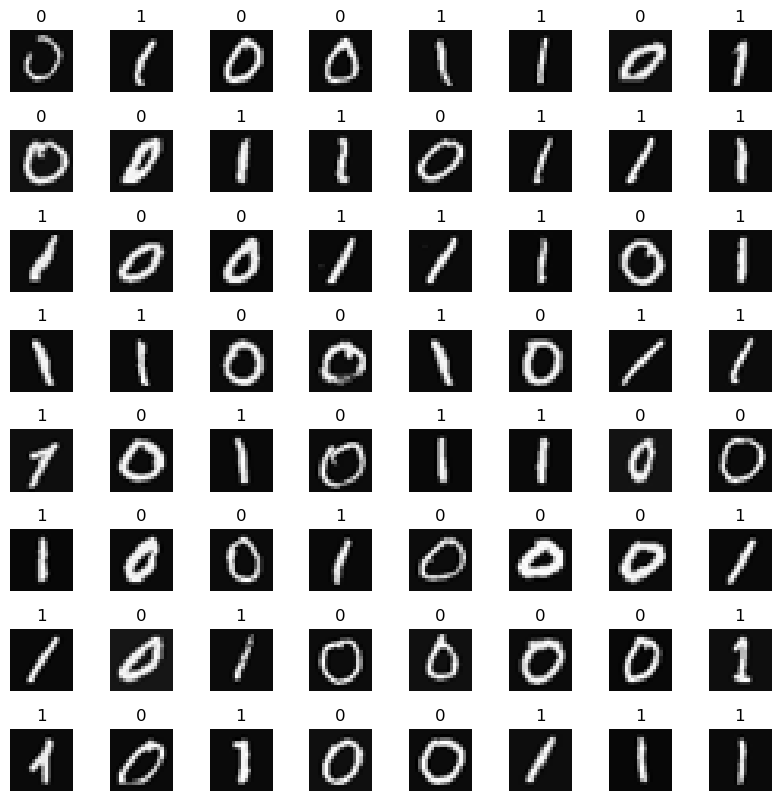

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
### Não necessita de modificar nada nesta célula ###

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Seleciona índices aleatórios
    random_index = np.random.randint(m)

    # Selecionar as linhas correspondentes aos índices aleatórios e
    # ajustar a imagem
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Mostrar a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Mostrar o rótulo acima da imagem
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Representação do modelo

- A rede neuronal possui três camadas densas com ativações sigmoides.
     - Relembrar que as entradas são valores de pixéis de imagens de dígitos.
     - Como as imagens têm tamanho $20\times20$, isso resulta em $400$ entradas.

 ![rede_neuronal](rede_neuronal.png)

- Os parâmetros têm dimensões dimensionadas para uma rede neuronal com $25$ unidades na camada 1, $15$ unidades na camada 2 e $1$ unidade de saída na camada 3.

     - Relembrar que as dimensões destes parâmetros são determinadas da seguinte forma:
         - Se a rede tiver $s_{in}$ unidades em uma camada e $s_{out}$ unidades na próxima camada, então:
             - $W$ terá a dimensão $s_{in} \times s_{out}$.
             - $b$ será um vetor com $s_{out}$ elementos.
  
     - Portanto, as dimensões de `W` e `b` são:
         - camada1: A dimensão de `W1` é (400, 25) e a dimensão de `b1` é (25,).
         - camada2: A dimensão de `W2` é (25, 15) e a dimensão de `b2` é (15,).
         - camada3: A dimensão de `W3` é (15, 1) e a dimensão de `b3` é (1,).
>**Nota:** O vetor de polarizações `b` pode ser representado como uma matriz 1-D (n,) ou 2-D (n,1). O Tensorflow utiliza uma representação 1-D, a qual será mantida neste trabalho.       

<a name="2.4"></a>
### 2.4 Implementação do modelo em Tensorflow

Os modelos do Tensorflow são construídos camada por camada. As dimensões de entrada de uma camada ($s_{in}$ acima) já são calculados. Só é necessário especificar as *dimensões de saída* de uma camada e isso determina a dimensão de entrada da próxima camada. A dimensão de entrada da primeira camada é determinada a partir do tamanho dos dados de entrada especificados na função `model.fit`.
>**Nota:** Também é possível adicionar uma camada de entrada que especifique a dimensão de entrada da primeira camada. Por exemplo: `tf.keras.Input(shape=(400,)), # especifica a dimensão de entrada`.

<a name="ex01"></a>
### Exercício 1

Construa a rede neuronal acima descrita usando Keras [Sequential model](https://keras.io/guides/sequential_model/) e [Dense Layer](https://keras.io/api/layers/core_layers/dense/) com uma ativação sigmoide.

In [9]:
# Modelo sequencial

model = Sequential(
    [
        tf.keras.Input(shape=(400,)),    #especifica a dimensão de entrada
        ### INICIE O CÓDIGO AQUI ###
        tf.keras.layers.Dense(25, activation='sigmoid'),  # camada 1
        tf.keras.layers.Dense(15, activation='sigmoid'),  # camada 2
        tf.keras.layers.Dense(1, activation='sigmoid'),   # camada 3 (saída)
        ### TERMINE O CÓDIGO AQUI ###
    ], name = "modelo"
)


Resumo do modelo.

In [10]:
model.summary()

Model: "modelo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

As contagens de parâmetros mostradas no resumo correspondem ao número de elementos nas matrizes de pesos e polarizações.

In [11]:
L1_num_params = 400 * 25 + 25  # parâmetros W1  + parâmetros b1
L2_num_params = 25 * 15 + 15   # parâmetros W2  + parâmetros b2
L3_num_params = 15 * 1 + 1     # parâmetros W3  + parâmetros b3
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Examinar mais detalhadamente os pesos para verificar se o Tensorflow produziu as mesmas dimensões que as calculadas acima.

In [12]:
[camada1, camada2, camada3] = model.layers

In [13]:
#### Verifique as dimensões dos pesos
W1,b1 = camada1.get_weights()
W2,b2 = camada2.get_weights()
W3,b3 = camada3.get_weights()
print(f"Dimensão W1 = {W1.shape}, Dimensão b1 = {b1.shape}")
print(f"Dimensão W2 = {W2.shape}, Dimensão b2 = {b2.shape}")
print(f"Dimensão W3 = {W3.shape}, Dimensão b3 = {b3.shape}")

Dimensão W1 = (400, 25), Dimensão b1 = (25,)
Dimensão W2 = (25, 15), Dimensão b2 = (15,)
Dimensão W3 = (15, 1), Dimensão b3 = (1,)


**Saída Esperada:**
```
Dimensão W1 = (400, 25), Dimensão b1 = (25,)  
Dimensão W2 = (25, 15), Dimensão  b2 = (15,)  
Dimensão W3 = (15, 1), Dimensão b3 = (1,)
```

`xx.get_weights` retorna uma matriz NumPy. Também é possível acessar os pesos diretamente na sua forma tensorial. Observe a dimensão dos tensores na camada final.

In [14]:
print(model.layers[2].weights)

[<Variable path=modelo/dense_2/kernel, shape=(15, 1), dtype=float32, value=[[-0.52522403]
 [ 0.40734226]
 [-0.4807374 ]
 [ 0.26167446]
 [ 0.21615052]
 [-0.2743389 ]
 [-0.1946485 ]
 [ 0.13230562]
 [ 0.3260765 ]
 [ 0.4846508 ]
 [-0.32208326]
 [ 0.22178435]
 [ 0.11207855]
 [ 0.5537209 ]
 [-0.08567953]]>, <Variable path=modelo/dense_2/bias, shape=(1,), dtype=float32, value=[0.]>]


O código a seguir define uma função de perda (*loss*) e executa a descida gradiente para ajustar os pesos do modelo aos dados de treino.

In [15]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(X,y,epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6491
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5099
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3622
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2482
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1790
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1369
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1093
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0899
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0757
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0648
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0564
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0497
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0444
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0400
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0364
Epoch 16/20
32/32 ━

Para executar o modelo em um exemplo para fazer uma previsão, use a função `predict` do [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Model). A entrada para `predict` é uma matriz, portanto o exemplo único é redimensionado para ser bidimensional.

In [16]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" Previsão a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a um
print(f" Previsão a um:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
 Previsão a zero: [[0.02402789]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
 Previsão a um:  [[0.98560965]]


A saída do modelo é interpretada como uma probabilidade. No primeiro exemplo acima, a entrada é zero. O modelo prevê que a probabilidade de a entrada ser um é quase zero. No segundo exemplo, a entrada é um. O modelo prevê que a probabilidade de a entrada ser um é quase um. De seguida, a probabilidade é comparada a um limiar (_threshold_) para fazer uma previsão final.

In [17]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"Previsão após ´threshold´: {yhat}")

Previsão após ´threshold´: 1


Comparar as previsões com os rótulos para uma amostra aleatória de 64 dígitos.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

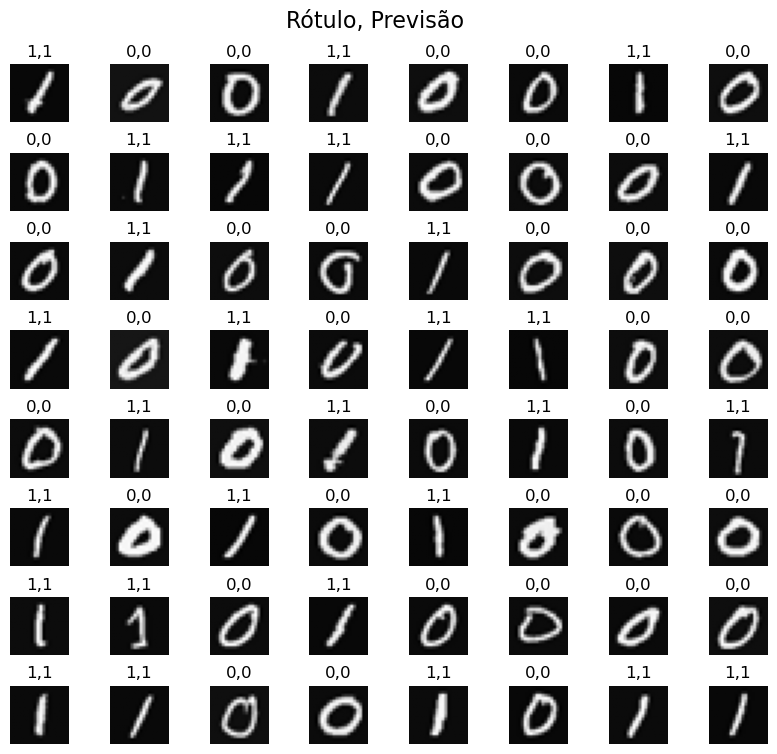

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
### Não necessita de modificar nada nesta célula ###

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) # [left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Seleciona índices aleatórios
    random_index = np.random.randint(m)

    # Selecionar as linhas correspondentes aos índices aleatórios e
    # ajustar a imagem
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Mostrar a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Previsão usando a Rede Neuronal
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Mostrar o rótulo acima da imagem
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Rótulo, Previsão", fontsize=16)
plt.show()

<a name="3"></a>
# 3 - Sistema TCLab



<img src="tclab.png" alt="tclab" width="400">


Com um classificador supervisionado, pode-se observar os dados do sistema térmico **1** (`Q1`) e treiná-lo para classificar quando o sistema está **ON** ou **OFF**. A seguir, pode-se aplicar o classificador a novos dados vindo do sistema térmico.

<a name="3.1"></a>
### 3.1 Bibliotecas
Carregar as bibilotecas para esta segunda parte com o sistema TCLab.

In [1]:
# Bibliotecas para processamento e visualização
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tclab import TCLab
import time

# Bibliotecas para classificação
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

<a name="3.2"></a>
### 3.2 Dados de treino
Gerar os dados a partir do sistema TCLab, ligando (**ON**) e desligando (**OFF**) o sistema térmico **1** (`Q1`) com durações de tempo diferentes. Os dados devem ser obtidos utilizando um período de amostragem de 1 segundo.

Deve gerar 50 minutos de dados para treinar um classificador que detete se o sistema térmico **1** (`Q1`) está a **ON** ou **OFF**.

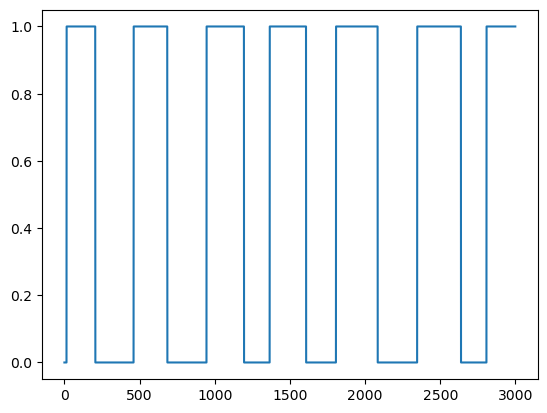

In [24]:
# Tempo total em minutos
run_time = 50.0

# 1 ciclo por segundo
ciclos = int(60.0*run_time)

# Array dos tempos
tm = np.array(range(ciclos)).astype(float)

# Gerar entradas ON/OFF para o sistema 1 (Q1)
Q1 = np.zeros(ciclos)

end = 15 # Colocar os primeiros 15 segundos de Q1 a zero
on = False
while end <= ciclos:
    start = end
    end += random.randint(150,300) # Manter o novo Q1 para intervalos diferentes
    on = not on
    if on:
        Q1[start:end] = 1
    else:
        Q1[start:end] = 0

plt.plot(Q1);

<a name="ex02"></a>
### Exercício 2
Usando o sinal acima gerado, aplique ao sistema **1** (`Q1`) somente 80% PWM de forma a evitar sobreaquecimento. Obtenha a temperatura `T1` do sistema a cada 1 segundo durante 50 minutos, conforme referido acima. Guarde os valores de tempo (`t`), temperatura (`T1`) e estado do sistema (`Q1`: 1 para **ON** e 0 para **OFF**) num _dataframe_ e coloque os dados em ficheiro `.txt` ou `.csv`, usando o nome `train_dados.csv`.

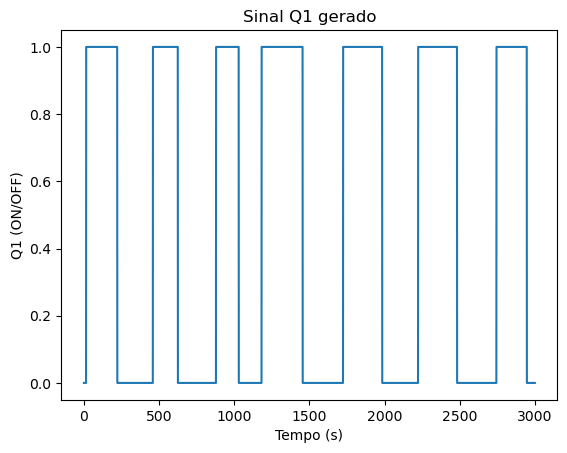

Iniciando recolha de dados por 50 minutos...
TCLab version 1.0.0
Arduino Leonardo connected on port COM7 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
t = 0s, T1 = 18.00 °C, Q1 = 0.0
t = 10s, T1 = 18.06 °C, Q1 = 0.0
t = 20s, T1 = 18.68 °C, Q1 = 1.0
t = 30s, T1 = 19.25 °C, Q1 = 1.0
t = 40s, T1 = 20.67 °C, Q1 = 1.0
t = 50s, T1 = 22.51 °C, Q1 = 1.0
t = 60s, T1 = 24.77 °C, Q1 = 1.0
t = 70s, T1 = 27.05 °C, Q1 = 1.0
t = 80s, T1 = 29.66 °C, Q1 = 1.0
t = 90s, T1 = 31.73 °C, Q1 = 1.0
t = 100s, T1 = 33.89 °C, Q1 = 1.0
t = 110s, T1 = 35.98 °C, Q1 = 1.0
t = 120s, T1 = 38.04 °C, Q1 = 1.0
t = 130s, T1 = 39.98 °C, Q1 = 1.0
t = 140s, T1 = 41.52 °C, Q1 = 1.0
t = 150s, T1 = 43.36 °C, Q1 = 1.0
t = 160s, T1 = 44.88 °C, Q1 = 1.0
t = 170s, T1 = 45.74 °C, Q1 = 1.0
t = 180s, T1 = 46.94 °C, Q1 = 1.0
t = 190s, T1 = 48.48 °C, Q1 = 1.0
t = 200s, T1 = 49.81 °C, Q1 = 1.0
t = 210s, T1 = 50.77 °C, Q1 = 1.0
t = 220s, T1 = 51.77 °C, Q1 = 1.0
t = 230s, T1 = 51.74 °C, Q1 = 0.0
t = 240s, T1 = 51.84 °C, Q1 =

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from tclab import TCLab

# -----------------------------
# 1. PARÂMETROS DE AQUISIÇÃO
# -----------------------------
run_time = 50.0               # minutos
ciclos = int(60 * run_time)   # 1 ciclo por segundo
tm = np.arange(ciclos).astype(float)

# -----------------------------
# 2. GERAR O SINAL Q1 (ON/OFF)
# -----------------------------
Q1 = np.zeros(ciclos)
end = 15   # primeiros 15 segundos OFF
on = False
while end <= ciclos:
    start = end
    end += random.randint(150, 300)   # duração aleatória
    on = not on
    if on:
        Q1[start:end] = 1
    else:
        Q1[start:end] = 0

plt.plot(Q1)
plt.xlabel("Tempo (s)")
plt.ylabel("Q1 (ON/OFF)")
plt.title("Sinal Q1 gerado")
plt.show()

# -----------------------------
# 3. APLICAR 80% PWM AO SISTEMA
# -----------------------------
pwm_limit = 0.80   # 80% PWM
T1_values = []
Q1_state_values = []
t_values = []

print("Iniciando recolha de dados por 50 minutos...")

try:
    with TCLab() as lab:
        for k in range(ciclos):
            # calcular PWM real
            Q1_pwm = Q1[k] * pwm_limit * 100  # 0 ou 80%
            lab.Q1(Q1_pwm)

            # ler temperatura
            T1 = lab.T1

            # armazenar dados
            t_values.append(k)
            T1_values.append(T1)
            Q1_state_values.append(Q1[k])

            # mostrar temperatura a cada 10 segundos
            if k % 10 == 0:
                print(f"t = {k}s, T1 = {T1:.2f} °C, Q1 = {Q1[k]}")

            time.sleep(1)

finally:
    try:
        lab.Q1(0)  # desligar Q1
        lab.close()
    except:
        pass
    print("Aquisição terminada!")

# -----------------------------
# 4. CRIAR DATAFRAME
# -----------------------------
df = pd.DataFrame({
    "t": t_values,
    "T1": T1_values,
    "Q1": Q1_state_values
})

print(df.head())

# -----------------------------
# 5. GUARDAR EM CSV
# -----------------------------
df.to_csv("train_dados.csv", index=False)
print("Ficheiro guardado como train_dados.csv")


<a name="3.3"></a>
### 3.3 Leitura dos dados
Importe os dados gravados em ficheiro ou use o _dataframe_ criado.

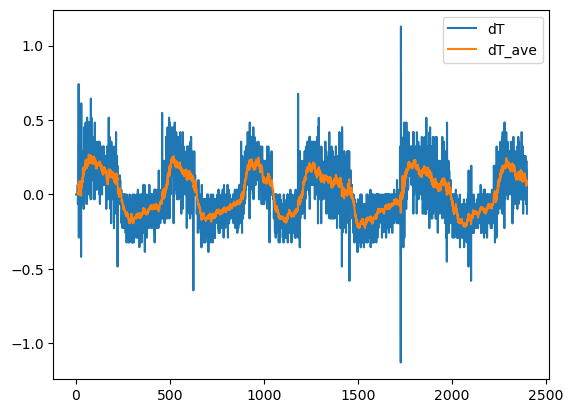

In [7]:
# Leitura dos dados de treino
df = pd.read_csv('train_dados.csv')

# Aplique a média móvel para filtrar (e.g. suavizar) os dados de temperatura
df['T1_ave'] = df['T1'].rolling(10).mean()

# Divida dataset em treino e validação
train, val = train_test_split(df, test_size=0.2, shuffle=False)
train = train.copy(deep=True)
val = val.copy(deep=True)

# Diferença para a média móvel
train['dT'] = train['T1'].diff()
train['dT_ave'] = train['T1_ave'].diff()
train[['dT','dT_ave']].plot();

<a name="3.4"></a>
### 3.4 Processamento dos dados
Na maioria dos casos, os dados devem ser sempre escalados em aplicações de *machine learning*. Isto pode ser feito através do `MinMaxScaler` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Verifique também se o formato dos dados está correto para o modelo, por exemplo, se a dimensão do _array_ `Numpy` coincide com a do classificador.

In [8]:
# Divida os dados de entrada e de saída
Xtrain = train[['T1']].values
ytrain = train[['Q1']].values
print(Xtrain.shape)
print(ytrain.shape)

# Formatação da dimensão dos dados de y para remover warning
ytrain = np.ravel(ytrain)

# Escalar
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

(2400, 1)
(2400, 1)


<a name="3.5"></a>
### 3.5 Treino - Caso 1
Use os dados para treinar um classificador de rede neuronal usando somente os dados de temperatura.

In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=200,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Rede Neuronal

clf.fit(Xtrain_s,ytrain)
yp = clf.predict(Xtrain_s)
train['NN_prev'] = yp

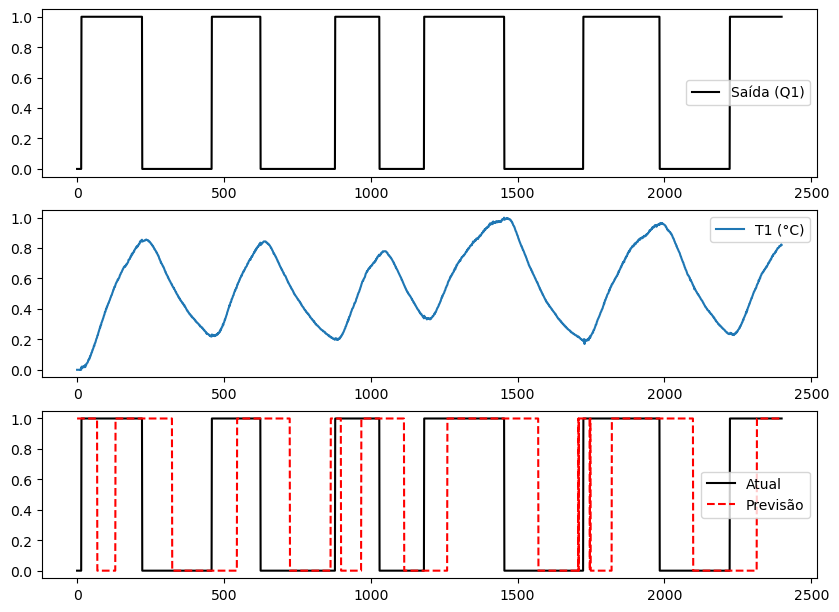

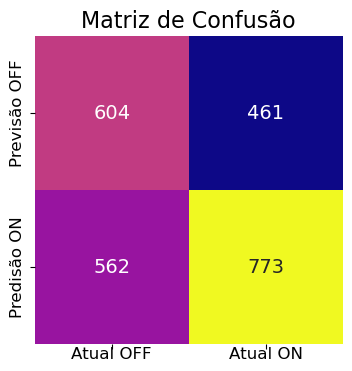

In [12]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(ytrain,'k-',label='Saída (Q1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xtrain_s,label='T1 (°C)')
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(train['Q1'],'k-',label='Atual')
plt.plot(train['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,ytrain)
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

Teça alguns comentários face aos resultados obtidos nesta experiência.

In [ ]:
# Coloque os comentários AQUI





### Validação
Teste o desempenho do classificador em **novos dados**. Pode gerar novos dados a partir do sistema térmico, ou usar a função `train_test_split` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


In [13]:
# Use a temperatura como feature
val.dropna(inplace=True)
val.reset_index(drop=True,inplace=True)

# Dados de entrada e saída para a NN
Xval = np.array(val[['T1']])
yval = np.array(val[['Q1']])

# Formatação da dimensão dos dados de y para remover warning
yval = np.ravel(yval)

# Escalar
s = MinMaxScaler()
Xval_s = s.fit_transform(Xval)

# Calcula previsão e guarda no dataframe
# Utiliza o classificador obtido para os dados de teste
yp = clf.predict(Xval_s)
val['NN_prev'] = yp

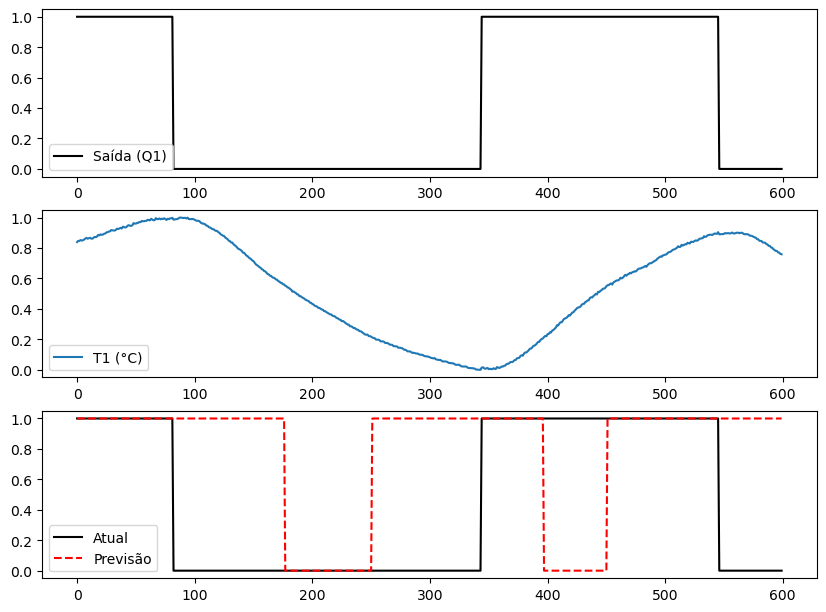

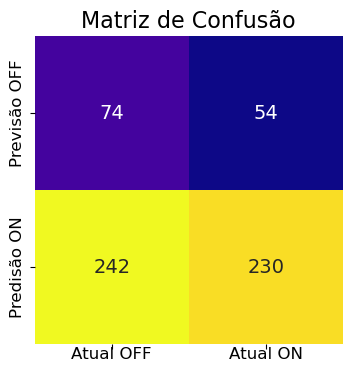

In [14]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(yval,'k-',label='Saída (Q1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xval_s,label=['T1 (°C)'])
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(val['Q1'],'k-',label='Atual')
plt.plot(val['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,yval)
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

Teça alguns comentários face aos resultados obtidos nesta experiência.

In [ ]:
# Coloque os comentários AQUI





<a name="3.6"></a>
### 3.6 Treino - Caso 2
Pode-se criar _features_ adicionais para melhorar o desempenho do algoritmo de _machine learning_.
Use os dados para treinar a rede usando a taxa de variação de temperatura. Para isso, execute os seguintes passos:
1. Criar uma nova _feature_ para o classificador (primeira derivada da temperatura)
2. Escalar os dados de entrada (os dados de saída continuam '0' ou '1')
3. Fazer a previsão usando o classificador de rede neuronal
4. Esboçar as previsões para verificar o desempenho

In [15]:
# Adicione a variação da temperatura como nova feature
train['dT'] = train['T1_ave'].diff()

# Elimine colunas vazias e inicia índice
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

# Dados de entrada e saída para a NN
Xtrain = np.array(train[['T1','dT']])
ytrain = np.array(train[['Q1']])

# Formatação da dimensão dos dados de y para remover warning
ytrain = np.ravel(ytrain)

# Escalar
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=200,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Neural Network

clf.fit(Xtrain_s,ytrain)
yp = clf.predict(Xtrain_s)
train['NN_prev'] = yp

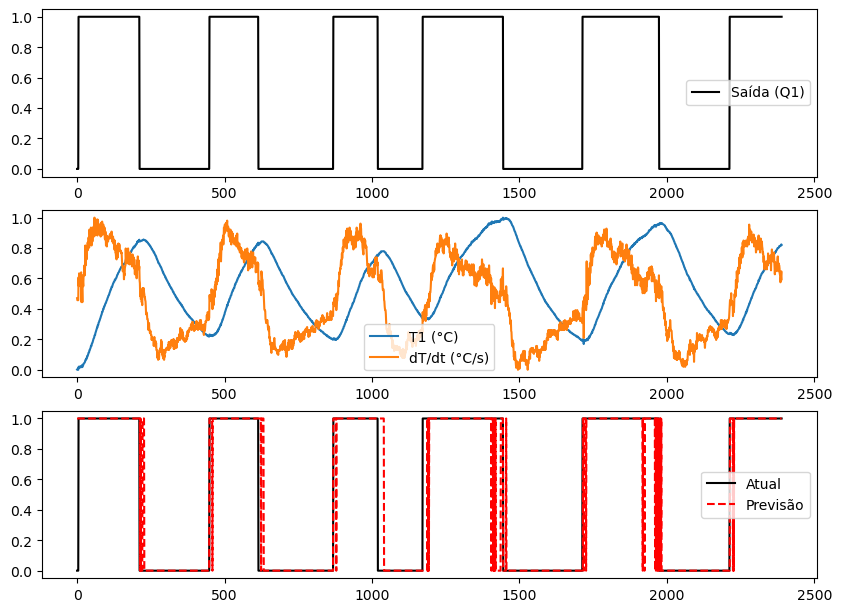

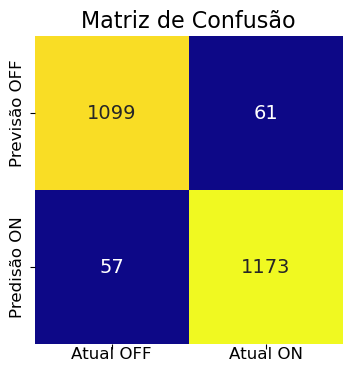

In [16]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(ytrain,'k-',label='Saída (Q1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xtrain_s,label=['T1 (°C)', 'dT/dt (°C/s)'])
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(train['Q1'],'k-',label='Atual')
plt.plot(train['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,ytrain)
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

Teça alguns comentários face aos resultados obtidos nesta experiência.

In [ ]:
# Coloque os comentários AQUI




### Validação
Teste o desempenho do classificador em **novos dados**. Pode gerar novos dados a partir do sistema térmico, ou usar a função `train_test_split` do [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
Para isso, execute os mesmos passos de processamento:
1. Criar uma nova _feature_ para o classificador (primeira derivada da temperatura)
2. Escalar os dados de entrada (os dados de saída continuam '0' ou '1')
3. Fazer a previsão usando o classificador de rede neuronal
4. Esboçar as previsões para verificar o desempenho

In [17]:
# Adicione a variação da temperatura como nova feature
val['dT'] = val['T1_ave'].diff()
val.dropna(inplace=True)
val.reset_index(drop=True,inplace=True)

# Dados de entrada e saída para a NN
Xval = np.array(val[['T1','dT']])
yval = np.array(val[['Q1']])

# Formatação da dimensão dos dados de y para remover warning
yval = np.ravel(yval)

# Escalar
s = MinMaxScaler()
Xval_s = s.fit_transform(Xval)

clf = MLPClassifier(solver='adam',alpha=1e-5,max_iter=500, learning_rate_init=0.01,\
       activation='relu',hidden_layer_sizes=(10,30,10),\
       random_state=1, shuffle=True) # Rede neuronal

clf.fit(Xval_s,yval)

# Calcula previsão e guarda no dataframe
yp = clf.predict(Xval_s)
val['NN_prev'] = yp

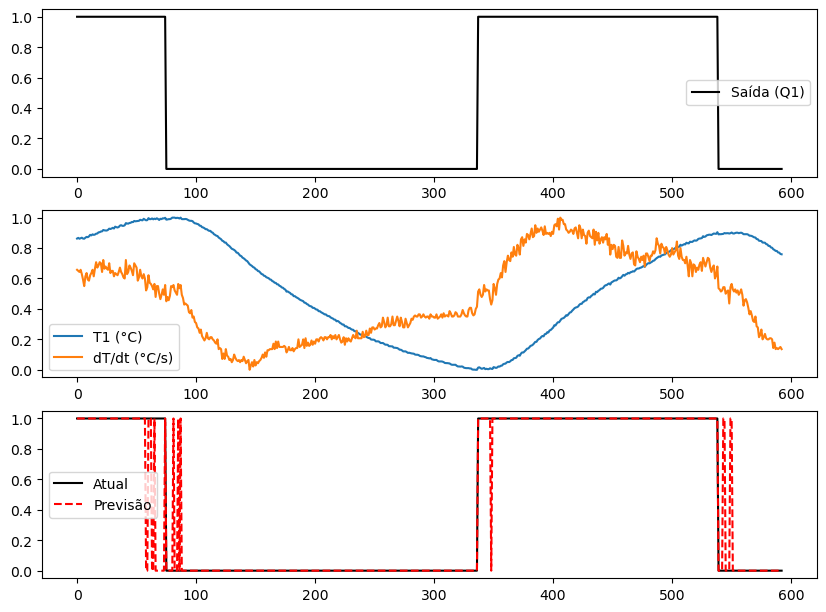

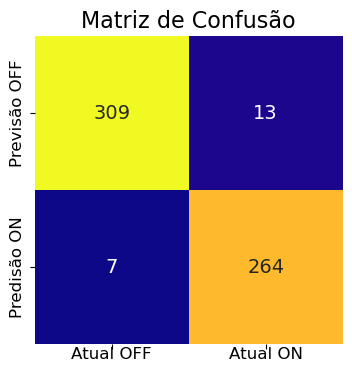

In [18]:
# Gráficos dos resultados
plt.figure(figsize=(10,10))
# Saída
plt.subplot(4,1,1)
plt.plot(yval,'k-',label='Saída (Q1)')
plt.legend()

# Entradas
plt.subplot(4,1,2)
plt.plot(Xval_s,label=['T1 (°C)', 'dT/dt (°C/s)'])
plt.legend()

# Gráfico da previsão
plt.subplot(4,1,3)
plt.plot(val['Q1'],'k-',label='Atual')
plt.plot(val['NN_prev'],'r--',label='Previsão')
plt.legend()

# Matriz de confusão
plt.figure(figsize=(15,4))
confusion = metrics.confusion_matrix(yp,yval)
plt.title('Matriz de Confusão',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Atual OFF','Atual ON'],va='center',size=12)
ax.set_yticklabels(['Previsão OFF','Predisão ON'],va='center',size=12);

Teça alguns comentários face aos resultados obtidos nesta experiência.

In [ ]:
# Coloque os comentários AQUI





<a name="ex03"></a>
### Exercício 3
Pode-se introduzir ainda mais _features_, tais como a segunda derivada da temperatura. Para isso, execute as mesmas etapas anteriores:
1. Criar uma nova _feature_ para o classificador (segunda derivada da temperatura)
2. Escalar os dados de entrada (os dados de saída continuam '0' ou '1')
3. Treinar o classificador de rede neuronal
4. Fazer a previsão usando a rede neuronal treinada
5. Esboçar as previsões para verificar o desempenho

In [ ]:
# Coloque o código/comentários AQUI





<a name="3.7"></a>
### 3.7 Conclusões

Apresente as principais conclusões relativas às experiências realizadas com o sistema TCLab.

In [ ]:
# Coloque os comentários AQUI



